In [55]:
%run ./model4.ipynb

In [56]:
a = 0.0
n_grids = [6,8,12,16,20,24,28,32,36,40,44,48]
#n_grids = [6,8,12,16,20,24,28]
#n_grids = [6]

############# Initialize ############
theta_start = 0
theta_end = np.pi
r_start = 3
r_end = 4

n_grid = 6
thetas = torch.linspace(theta_start,theta_end,steps=n_grid, dtype=torch.double)
rs = torch.linspace(r_start,r_end,steps=n_grid, dtype=torch.double)
f_free = torch.zeros((n_grid,5*n_grid-2), dtype=torch.double)
f_free[:,:n_grid] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,n_grid:2*n_grid] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,2*n_grid:3*n_grid-2] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,1:-1])
f_free[:,3*n_grid-2:4*n_grid-2] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,4*n_grid-2:5*n_grid-2] = 0.001*torch.ones((n_grid,n_grid), dtype=torch.double)
f_free = f_free.reshape(-1,)
f_free = torch.nn.Parameter(f_free, requires_grad=True)

#interp_mode = "bicubic"
#align_corners = True
M = 1.0

############# Train ##############
ii = 0
for n in n_grids:
    print("n={}".format(n))
    if ii > 0:
        f_free_old = f_free.reshape(n_old, 5*n_old-2)
        #f_pad_old = free2pad(f_free_old, n_old)
        f_free = interp_f_free(f_free_old, n, n_old).reshape(-1,)
        f_free = torch.nn.Parameter(f_free, requires_grad=True)
    f_free, error, duration = train(a, n, f_free, maxiter=1000)
    print(error)
    torch.save(f_free.clone(), "./kerr_result/f_free_a_%.3f_n_%d_fix_a_sweep_n"%(a,n))
    np.save("./kerr_result/error_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n), error)
    np.save("./kerr_result/time_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n), duration)
    np.save("./kerr_result/losses_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n), error)
    ii = ii + 1
    n_old = n

n=6
time=46.88653588294983
3.842280579897573e-06
n=8
time=20.775413036346436
1.1149405503541932e-06
n=12
time=39.72388505935669
2.007917835975314e-07
n=16
time=40.569754123687744
6.053397111695583e-08
n=20
time=50.879552125930786
2.4070139642997663e-08
n=24
time=80.08733201026917
1.1377590310863445e-08
n=28
time=88.07459712028503
6.05327471069515e-09
n=32
time=102.75643491744995
3.509843342360784e-09
n=36
time=117.2785918712616
2.172587044622406e-09
n=40
time=131.72841787338257
1.4157147451661055e-09
n=44
time=151.2459897994995
9.615381854987877e-10
n=48
time=175.81905364990234
6.757332007880785e-10


In [57]:
f_frees = []
times = []
errors = []
for n in n_grids:
    f_free = torch.load("./kerr_result/f_free_a_%.3f_n_%d_fix_a_sweep_n"%(a,n))
    duration = np.load("./kerr_result/time_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n))
    error = np.load("./kerr_result/error_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n))
    losses = np.load("./kerr_result/losses_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n))
    f_frees.append(f_free)
    times.append(duration)
    errors.append(error)

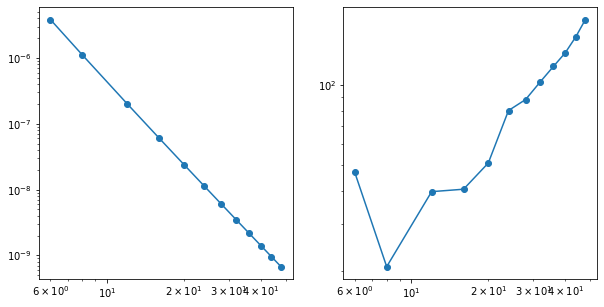

In [58]:
# n_grids -> n_grids - 1

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(n_grids, errors, marker="o")
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(n_grids, times, marker="o")
plt.yscale('log')
plt.xscale('log')

In [68]:
start_id = -9
end_id = -1

(np.log(errors[end_id])-np.log(errors[start_id]))/(np.log(2*n_grids[end_id]-1)-np.log(2*n_grids[start_id]-1))

-4.013932550204011